## Importing Libraries

In [1]:
# general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for logestic regression and confusion matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

# for estimate nan values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Importing Data

In [2]:
data=pd.read_csv('Banking Dataset - Marketing Targets.csv')
display(data.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,NaN,unknown,no
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,NaN
2,33.0,entrepreneur,married,secondary,no,2.0,NaN,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,NaN,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,NaN,198.0,1.0,-1.0,NaN,unknown,no


## Checking NaN values

In [3]:
NaSum=pd.DataFrame(data.isna().sum())
NaSum.columns=['NaN']
NaSum.transpose()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
NaN,4592,4520,4460,4541,4569,4581,4490,4545,4562,4597,4551,4547,4530,4484,4530,4516,4584


## Convert categories data to numeric 

In [4]:
cols_to_category = ["job","marital","education","default","housing","loan","contact","month","poutcome",'y']

# Numeric function for converting categories data to numeric value
def Numeric(data,cols_to_category,NA=True):
    for col in cols_to_category:
        var=list(data[col].unique())
        if NA==True:
            var.remove(np.nan)
        
        ctg=[i for i in range(len(var))]
        out=pd.DataFrame({col:var,'numeric':ctg})
        display(out.style.hide(axis='index'))
        data[col].replace(var,ctg,inplace=True)

Numeric(data,cols_to_category)
data.head()

job,numeric
management,0
technician,1
entrepreneur,2
blue-collar,3
unknown,4
retired,5
admin.,6
services,7
self-employed,8
unemployed,9


marital,numeric
married,0
single,1
divorced,2


education,numeric
tertiary,0
secondary,1
unknown,2
primary,3


default,numeric
no,0
yes,1


housing,numeric
yes,0
no,1


loan,numeric
no,0
yes,1


contact,numeric
unknown,0
cellular,1
telephone,2


month,numeric
may,0
jun,1
jul,2
aug,3
oct,4
nov,5
dec,6
jan,7
feb,8
mar,9


poutcome,numeric
unknown,0
failure,1
other,2
success,3


y,numeric
no,0
yes,1


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,0.0,0.0,0.0,0.0,2143.0,0.0,0.0,0.0,5.0,0.0,261.0,1.0,-1.0,NaN,0.0,0.0
1,44.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,5.0,0.0,151.0,1.0,-1.0,0.0,0.0,NaN
2,33.0,2.0,0.0,1.0,0.0,2.0,NaN,1.0,0.0,5.0,0.0,76.0,1.0,-1.0,0.0,0.0,0.0
3,47.0,3.0,0.0,2.0,NaN,1506.0,0.0,0.0,0.0,5.0,0.0,92.0,1.0,-1.0,0.0,0.0,0.0
4,33.0,4.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,5.0,NaN,198.0,1.0,-1.0,NaN,0.0,0.0


## Estimation of NaN values

In [5]:
numeric_transformer = Pipeline(steps=[
   ('imputer', IterativeImputer()),
])

categorical_transformer = Pipeline(steps=[
   ('imputer', IterativeImputer(estimator=DecisionTreeClassifier()))
])
preprocessor = ColumnTransformer(
   transformers=[
       ('categorical', categorical_transformer, ['age','job','marital','education','default']),
       ('numeric1', numeric_transformer, ['balance']),
       ('categorical1', categorical_transformer,['housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']),
       
])
impute = Pipeline(
   steps=[
       ("processing", preprocessor),
       
   ]
)
columns=data.columns
data=pd.DataFrame(impute.fit_transform(data))
data.columns=columns

C:\Users\hesam\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\hesam\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,0.0,0.0,0.0,0.0,2143.000000,0.0,0.0,0.0,5.0,0.0,261.0,1.0,-1.0,0.0,0.0,0.0
1,44.0,1.0,1.0,1.0,0.0,1360.860891,0.0,0.0,0.0,5.0,0.0,151.0,1.0,-1.0,0.0,0.0,0.0
2,33.0,2.0,0.0,1.0,0.0,2.000000,0.0,1.0,0.0,5.0,0.0,76.0,1.0,-1.0,0.0,0.0,0.0
3,47.0,3.0,0.0,2.0,0.0,1506.000000,0.0,0.0,0.0,5.0,0.0,92.0,1.0,-1.0,0.0,0.0,0.0
4,33.0,4.0,1.0,2.0,0.0,1.000000,1.0,0.0,0.0,5.0,1.0,198.0,1.0,-1.0,0.0,0.0,0.0


## Checking NaNs after estimation

In [7]:
NaSum=pd.DataFrame(data.isna().sum())
NaSum.columns=['NaN']
NaSum.transpose()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Import Test and Train data

In [8]:
train_data=pd.read_csv('Banking Dataset - Marketing Targets - Train.csv')
test_data=pd.read_csv('Banking Dataset - Marketing Targets - Test.csv')

## Modeling by train data

In [9]:
clf = LogisticRegressionCV(Cs=100,cv=10,scoring='f1' ,max_iter=2000
                           ,random_state=0).fit( train_data[train_data.columns[:-1]],train_data['y'])

In [10]:
pd.DataFrame({'coefficients':clf.coef_[0]}, index=list(data.columns[:-1]))

,coefficients
age,-0.000997
job,0.016519
marital,0.108348
education,-0.148838
default,-0.017843
balance,0.000025
housing,0.655032
loan,-0.299464
contact,0.360612
day,-0.005803


## Display confusion matrix and metrics for train data


In [11]:
y_true=train_data['y']
y_pred=clf.predict(train_data[train_data.columns[:-1]])

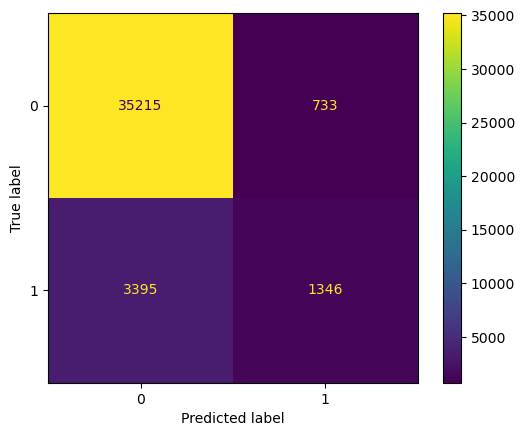

In [12]:
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()


In [13]:
print(classification_report(y_true, y_pred, target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.91      0.98      0.94     35948
         Yes       0.65      0.28      0.39      4741

    accuracy                           0.90     40689
   macro avg       0.78      0.63      0.67     40689
weighted avg       0.88      0.90      0.88     40689



## Display confusion matrix and metrics for test data


In [14]:
y_pred=clf.predict(test_data[test_data.columns[:-1]])
y_true=test_data['y']
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      3960
         1.0       0.59      0.26      0.36       562

    accuracy                           0.89      4522
   macro avg       0.75      0.62      0.65      4522
weighted avg       0.86      0.89      0.87      4522



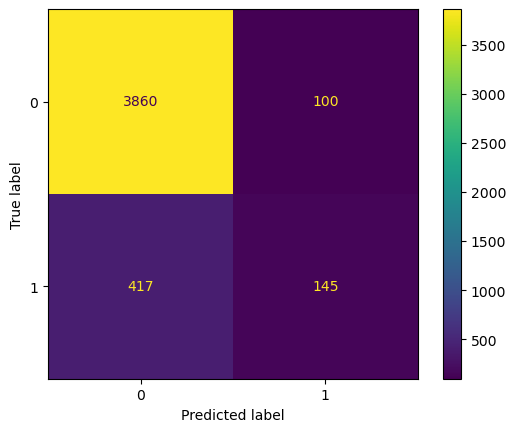

In [15]:
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()